In [112]:
import numpy as np 
import pandas as pd
import torch

# 1. Loading Data

In [113]:
X_train = pd.read_csv("../Xtrain_hgcGIrA.csv")
y = pd.read_csv("../Ytrain_yL5OjS4.csv")

X_test = pd.read_csv("../Xtest.csv")
y_test = pd.read_csv("../Ysample_iX1anNa.csv")

In [114]:
X_train

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...
31114,2019-05-13,9,0,BE,08:00:00,2,0.152,0.18860,0.157000,0.080,0.100,NaN
31115,2019-05-14,9,0,BE,08:00:00,2,0.153,0.18040,0.191000,0.089,0.121,NaN
31116,2019-05-15,9,0,BE,08:00:00,2,0.166,0.14900,0.168000,0.099,0.129,NaN
31117,2019-03-21,9,0,BE,08:00:00,2,0.182,0.19300,0.162000,0.074,0.101,NaN


In [115]:
X = pd.concat([X_train, X_test], axis=0)
X.reset_index(drop=True, inplace=True)

In [116]:
X

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...
44866,2019-07-03,9,0,BE,08:00:00,2,0.121,0.145,0.15715,0.071,0.095,NaN
44867,2019-07-04,9,0,BE,08:00:00,2,0.144,0.139,0.15300,0.079,0.102,NaN
44868,2019-07-05,9,0,BE,08:00:00,2,0.128,0.137,0.12700,0.072,0.089,NaN
44869,2019-05-28,9,0,BE,08:00:00,2,0.164,0.187,0.15500,0.100,0.130,NaN


In [117]:
X['hour'].nunique()

5

In [118]:
def transform(X):

    columns_to_delete = ['way', 'composition','date']
    X = X.drop(columns=columns_to_delete, axis=1)
    #X['date'] = pd.to_datetime(X['date'], format='%Y-%m-%d')
    X['hour'] = pd.to_datetime(X['hour']).dt.hour
    X = pd.get_dummies(X, columns=["station"])
    X = pd.get_dummies(X, columns=["train"])
    #X=X.drop(["train","station"], axis=1)
    return X

In [119]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imputer = IterativeImputer(estimator=BayesianRidge(), random_state=0)
data = transform(X)
columns = data[['hour', 'p1q0','p2q0','p3q0','p0q1','p0q2','p0q3']].columns.tolist()
data[['hour', 'p1q0','p2q0','p3q0','p0q1','p0q2','p0q3']] = pd.DataFrame(imputer.fit_transform(data[['hour', 'p1q0','p2q0','p3q0','p0q1','p0q2','p0q3']]), columns=columns)

data.head()

C:\Users\khaba\AppData\Local\Temp\ipykernel_15728\363187802.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X['hour'] = pd.to_datetime(X['hour']).dt.hour
c:\Users\khaba\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,station_AA,station_AB,station_AC,...,train_46,train_47,train_48,train_49,train_50,train_51,train_52,train_53,train_54,train_55
0,6.0,0.114336,0.129463,0.189309,0.201,0.138,0.091,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6.0,0.120097,0.134503,0.194256,0.204,0.152,0.106,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6.0,0.121557,0.135827,0.198459,0.213,0.153,0.111,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6.0,0.121736,0.135562,0.197872,0.213,0.152,0.108,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,6.0,0.121063,0.133755,0.194326,0.210,0.147,0.096,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [120]:
X["hour"].value_counts()

hour
07:00:00    14647
08:00:00    14398
06:00:00     7117
09:00:00     4097
11:00:00        2
Name: count, dtype: int64

In [121]:
X = data

In [122]:
# X.replace(False, 0, inplace=True)
# X.replace(True, 1, inplace=True)

In [123]:
# X.head()

In [124]:
X['hour'].isna().sum()

0

In [125]:
X_train = X.head(31119)
X_test = X.tail(len(X) - 31119)

In [126]:
X_train

,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,station_AA,station_AB,station_AC,...,train_46,train_47,train_48,train_49,train_50,train_51,train_52,train_53,train_54,train_55
0,6.0,0.114336,0.129463,0.189309,0.201,0.138,0.091000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6.0,0.120097,0.134503,0.194256,0.204,0.152,0.106000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6.0,0.121557,0.135827,0.198459,0.213,0.153,0.111000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6.0,0.121736,0.135562,0.197872,0.213,0.152,0.108000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,6.0,0.121063,0.133755,0.194326,0.210,0.147,0.096000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31114,8.0,0.152000,0.188600,0.157000,0.080,0.100,0.096595,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31115,8.0,0.153000,0.180400,0.191000,0.089,0.121,0.118668,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31116,8.0,0.166000,0.149000,0.168000,0.099,0.129,0.121151,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31117,8.0,0.182000,0.193000,0.162000,0.074,0.101,0.094082,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [127]:
nombre_lignes_nulles = (X_train['hour'] == 'NAN').sum()
nombre_lignes_nulles

0

In [128]:
X_train['hour'].isna().sum()

0

In [129]:
X_train['hour'].value_counts()

hour
7.000000    10064
8.000000    10028
6.000000     4995
9.000000     2826
7.348038      235
            ...  
6.804539        1
6.831571        1
6.843795        1
6.787503        1
6.869745        1
Name: count, Length: 2786, dtype: int64

In [130]:
X_train['hour'].isna().sum()

0

In [131]:
Ytrain = y.drop(["Unnamed: 0"], axis=1)
Ytrain

,p0q0
0,0.216
1,0.216
2,0.227
3,0.229
4,0.225
...,...
31114,0.111
31115,0.143
31116,0.139
31117,0.117


# Training Model : 

In [132]:
X_test = X_test.astype(np.float32)
X_train = X_train.astype(np.float32)
y = y.astype(np.float32)

In [133]:
y = y.drop(["Unnamed: 0"], axis=1)

y

,p0q0
0,0.216
1,0.216
2,0.227
3,0.229
4,0.225
...,...
31114,0.111
31115,0.143
31116,0.139
31117,0.117


In [134]:
X_train = torch.from_numpy(X_train.values)
X_test = torch.from_numpy(X_test.values)
y = torch.from_numpy(y.values).reshape(-1,1)

In [135]:
print("X_train.shape:",X_train.shape)
print("x_test.shape:",X_test.shape)
print("Y_train.shape:",y.shape)

X_train.shape: torch.Size([31119, 98])
x_test.shape: torch.Size([13752, 98])
Y_train.shape: torch.Size([31119, 1])


In [137]:
y

tensor([[0.2160],
        [0.2160],
        [0.2270],
        ...,
        [0.1390],
        [0.1170],
        [0.4160]])

In [138]:
from TF import evaluate_model, train_network

In [139]:
import torch.nn as nn

In [140]:
class LinearR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid() 

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

In [141]:
import torch
import numpy as np, pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score,roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import torch.nn as nn

In [142]:
num_epochs = 500
batch_size = 128
loss_function = nn.MSELoss()

In [26]:
weight_decay = 0.0 #set to 0; no L2 Regularizer; passed into the Optimizer
lambda_L1=0.0 #Set to 0; no L1 reg; manually added in loss (train_network)

In [143]:
class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        torch.manual_seed(2020)
        self.fc1 = nn.Linear(98, 150)
        self.fc2 = nn.Linear(150, 192)
        self.fc3 = nn.Linear(192, 384)
        self.out = nn.Linear(384, 1)
        self.relu = nn.ReLU()
        self.final = nn.Sigmoid()
    
    def forward(self, x):
        op = self.fc1(x)
        op = self.relu(op)
        op = self.fc2(op)
        op = self.relu(op)
        op = self.fc3(op)
        op = self.relu(op)
        op = self.out(op)
        y = self.final(op)
        return y

In [144]:
model = NeuralNetwork()

In [145]:
adam_optimizer = torch.optim.Adam(model.parameters(), lr= 0.001, weight_decay=weight_decay)

In [146]:
adam_loss = train_network(model, adam_optimizer, loss_function ,num_epochs,batch_size, X_train,y,lambda_L1=0.0)

Epoch: 0 - Loss:0.0230
Epoch: 100 - Loss:0.0010
Epoch: 200 - Loss:0.0005
Epoch: 300 - Loss:0.0005
Epoch: 400 - Loss:0.0005


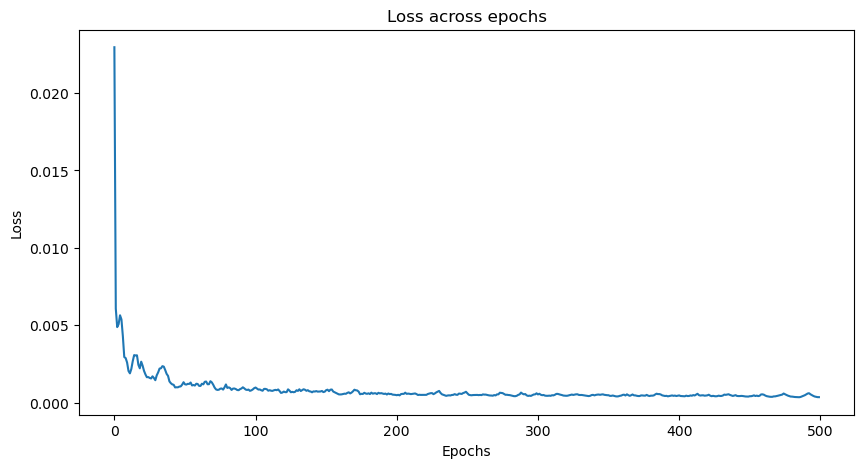

In [147]:
plt.figure(figsize=(10, 5))
plt.plot(adam_loss)
plt.title('Loss across epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [148]:
with torch.no_grad():
    predictions = model(X_test)

print(predictions)

tensor([[0.2391],
        [0.2290],
        [0.2463],
        ...,
        [0.1083],
        [0.1487],
        [0.1131]])


In [32]:
predictions_df = pd.DataFrame({'Predictions': predictions.numpy().flatten()})
predictions_df.index = predictions_df.index + 1
predictions_df.to_csv('predictions_NoReg.csv', index=True)

## Reg L1

In [33]:
#Set to 0; no L2 reg
weight_decay=0.0 

#Enables L1 Regularization
lambda_L1 = 0.0001 

model = LinearR(2950, 1)

#Binary Crosss Entropy Loss
loss_function = nn.MSELoss()
 
adam_optimizer = torch.optim.Adam(model.parameters(),lr= 0.001 ,weight_decay=weight_decay)

In [34]:
adam_loss = train_network(model,adam_optimizer,loss_function, num_epochs,batch_size,X_train,y ,lambda_L1=lambda_L1)

Epoch: 0 - Loss:0.0710
Epoch: 100 - Loss:0.0063
Epoch: 200 - Loss:0.0063
Epoch: 300 - Loss:0.0063
Epoch: 400 - Loss:0.0063


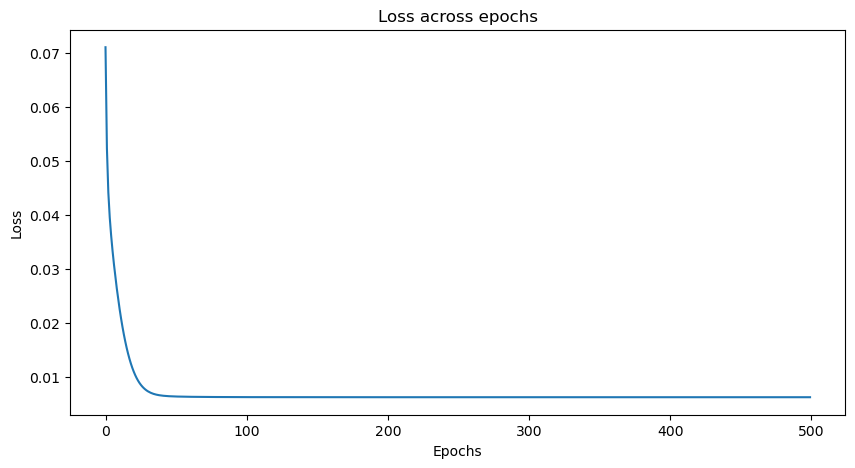

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(adam_loss)
plt.title('Loss across epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [36]:
with torch.no_grad():
    predictions = model(X_test)

print(predictions)

tensor([[0.2306],
        [0.2244],
        [0.2355],
        ...,
        [0.1386],
        [0.1625],
        [0.1429]])


In [37]:
predictions_df = pd.DataFrame({'Predictions': predictions.numpy().flatten()})
predictions_df.index = predictions_df.index + 1
predictions_df.to_csv('predictions_RegL1.csv', index=True)

## Reg L2

In [38]:
num_epochs = 500
batch_size= 128
weight_decay=0.001 #Enables L2 Regularization
lambda_L1 = 0.00 #Set to 0; no L1 reg

In [39]:
model = LinearR(2950, 1)
loss_function = nn.MSELoss() #Binary Crosss Entropy Loss

In [40]:
adam_optimizer = torch.optim.Adam(model.parameters(),lr= 0.001, weight_decay=weight_decay)

In [41]:
adam_loss = train_network(model,adam_optimizer,loss_function, num_epochs,batch_size,X_train,y,lambda_L1=lambda_L1)

Epoch: 0 - Loss:0.0699
Epoch: 100 - Loss:0.0062
Epoch: 200 - Loss:0.0062
Epoch: 300 - Loss:0.0062
Epoch: 400 - Loss:0.0062


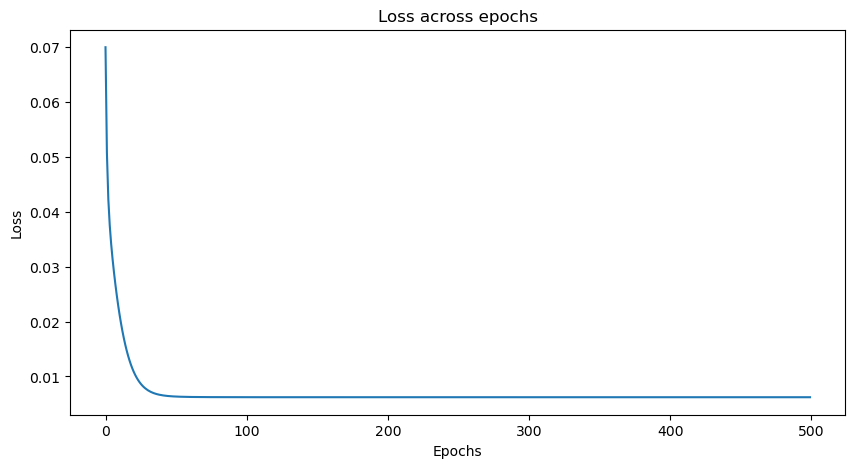

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(adam_loss)
plt.title('Loss across epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [43]:
with torch.no_grad():
    predictions = model(X_test)

print(predictions)

tensor([[0.2476],
        [0.2421],
        [0.2520],
        ...,
        [0.1709],
        [0.1946],
        [0.1767]])


In [44]:
predictions_df = pd.DataFrame({'Predictions': predictions.numpy().flatten()})
predictions_df.index = predictions_df.index + 1
predictions_df.to_csv('predictions_RegL2.csv', index=True)

## Reg L2L1

In [45]:
num_epochs = 500
batch_size= 128
lambda_L1 = 0.0001 #Enabled L1
weight_decay =0.001 #Enabled L2
model = LinearR(2950, 1)
loss_function = nn.MSELoss()

In [46]:
adam_optimizer = torch.optim.Adam(model.parameters(), lr= 0.001, weight_decay=weight_decay)

In [47]:
adam_loss = train_network(model,adam_optimizer,loss_function ,num_epochs,batch_size,X_train,y,lambda_L1=lambda_L1)

Epoch: 0 - Loss:0.0723
Epoch: 100 - Loss:0.0073
Epoch: 200 - Loss:0.0073
Epoch: 300 - Loss:0.0073


: 

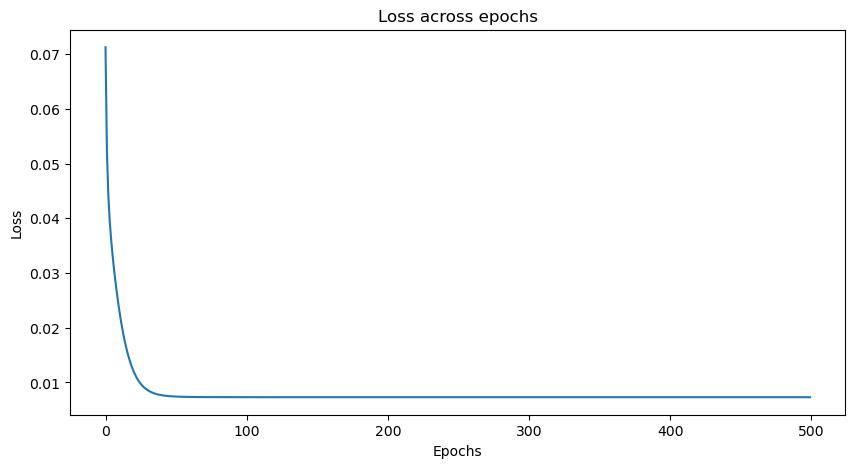

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(adam_loss)
plt.title('Loss across epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
with torch.no_grad():
    predictions = model(X_test)

print(predictions)

tensor([[0.2486],
        [0.2432],
        [0.2530],
        ...,
        [0.1742],
        [0.1971],
        [0.1788]])


In [ ]:
predictions_df = pd.DataFrame({'Predictions': predictions.numpy().flatten()})
predictions_df.index = predictions_df.index + 1
predictions_df.to_csv('predictions_RegL1AndL2.csv', index=True)